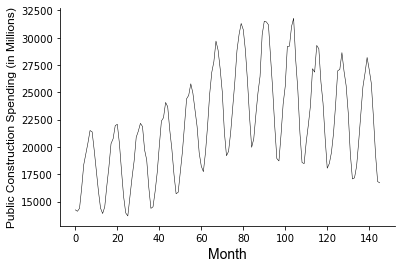

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

dfPub = pd.read_csv('C:/Users/nicko/Desktop/Module 3/M3/ConstructionTimeSeriesDataV2.csv')

fig,ax = plt.subplots()
ax.plot(dfPub['Public Construction'], label = 'Public Construction', color = 'k', linewidth = .5)
ax.set_xlabel('Month', fontsize = '14', fontname = 'Arial')
ax.set_ylabel('Public Construction Spending (in Millions)', fontsize = '12', fontname = 'Arial')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.plot(dfPub.Month, dfPub['Public Construction'])


In [78]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(dfPub.index,dfPub['Public Construction'])
print('intercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

intercept = 18327.939893765724     slope = 52.00857586303297      p_value =  3.028349007007645e-09


In [79]:
def create_regress_col(row, intercept, slope):
    return float(intercept) + float(row['Month']) * slope
    
dfPub['regress'] = dfPub.apply(create_regress_col,args = (intercept,slope),axis = "columns")
dfPub['R1'] = dfPub['Public Construction'] - dfPub['regress']
dfPub.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1': '{:,.0f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regress,R1
0,1,Jan-02,59516,45273,"14,243","18,380","-4,137"
1,2,Feb-02,58588,44475,"14,113","18,432","-4,319"
2,3,Mar-02,63782,49396,"14,386","18,484","-4,098"
3,4,Apr-02,69504,53283,"16,221","18,536","-2,315"
4,5,May-02,73384,55009,"18,375","18,588",-213
5,6,Jun-02,77182,57801,"19,381","18,640",741
6,7,Jul-02,78863,58494,"20,369","18,692","1,677"
7,8,Aug-02,79460,57953,"21,507","18,744","2,763"
8,9,Sep-02,76542,55157,"21,385","18,796","2,589"
9,10,Oct-02,75710,56023,"19,687","18,848",839


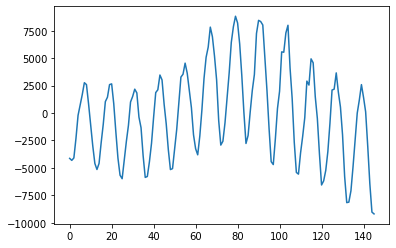

In [80]:
plt.plot(dfPub.index,dfPub.R1)

    Month Month-Year  Total Construction  Private Construction  \
0       1     Jan-02               59516                 45273   
1       2     Feb-02               58588                 44475   
2       3     Mar-02               63782                 49396   
3       4     Apr-02               69504                 53283   
4       5     May-02               73384                 55009   
5       6     Jun-02               77182                 57801   
6       7     Jul-02               78863                 58494   
7       8     Aug-02               79460                 57953   
8       9     Sep-02               76542                 55157   
9      10     Oct-02               75710                 56023   
10     11     Nov-02               71362                 53552   
11     12     Dec-02               63984                 48023   

    Public Construction       regress           R1  lag12  
0                 14243  18379.948470 -4136.948470    NaN  
1                 141

C:\Users\nicko\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


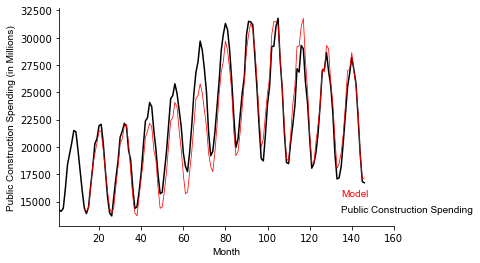

In [83]:
# Create column with lag of 12 (1-Year cycle)
lag = 12
dfPub['lag12'] = np.NaN
for i in range(len(dfPub['lag12']))[lag:]:
    dfPub['lag12'].iloc[i] = dfPub['Public Construction'].iloc[i-12]
print(dfPub.head(n=12))

# Compute autocorrelations
for i in range(int(len(dfPub.index)/2)):
    print('autocorrelation, lag =',i,':',dfPub.R1.autocorr(lag = i))
    
fig,ax = plt.subplots()
ax.plot(dfPub.Month, dfPub['Public Construction'], c = 'k')
ax.plot(dfPub.Month, dfPub.lag12, c = 'r', linewidth = .75)
ax.set_xlim([1,160])
ax.text(135, 14000, 'Public Construction Spending', color = 'k', font = "Arial")
ax.text(135, 15500, 'Model', color = 'r', font = "Arial")
ax.set_xlabel('Month', font = "Arial")
ax.set_ylabel('Public Construction Spending (in Millions)', font = "Arial")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



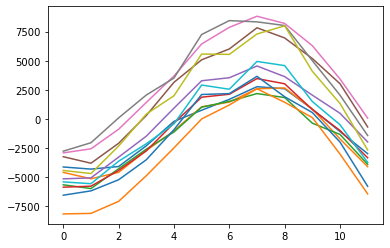

In [32]:
dfCycle = pd.DataFrame()
cycleLen = 12
for i in range(int(len(dfPub.index)/cycleLen)):
    newData = pd.DataFrame({i:dfPub['R1'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newData.index = range(0,len(newData))
    dfCycle = pd.concat([dfCycle,newData],axis=1)

fig,ax = plt.subplots()
ax.plot(dfCycle)

              0            1            2            3            4  \
0  -4136.948470 -4600.051380 -5669.154290 -5872.257201 -5157.360111   
1  -4318.957045 -5150.059956 -5991.162866 -5787.265777 -5071.368687   
2  -4097.965621 -4598.068532 -4289.171442 -4436.274352 -3288.377263   
3  -2314.974197 -2716.077108 -2607.180018 -2752.282928 -1488.385839   
4   -212.982773 -1025.085683 -1127.188594  -363.291504   922.605585   
5    741.008651  1036.905741  1004.802830  1862.699920  3274.597010   
6   1677.000075  1438.897165  1503.794254  2114.691344  3534.588434   
7   2762.991499  2588.888589  2171.785679  3461.682768  4544.579858   
8   2588.982923  2654.880013  1831.777103  3016.674192  3630.571282   
9    838.974348   848.871437  -370.231473   798.665617  2039.562706   
10 -1090.034228 -1723.137139 -1339.240049  -997.342959   481.554130   
11 -2991.042804 -4110.145714 -3905.248625 -3345.351535 -1984.454446   

              5            6            7            8            9  \
0  -3

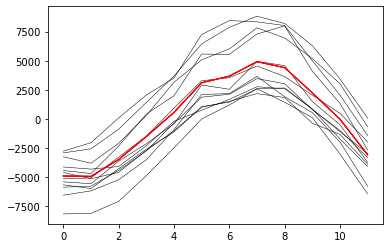

In [67]:
avg = []
for i in range(len(dfCycle.index)):
    avg.append(dfCycle.iloc[i].mean())

dfCycle = pd.concat([dfCycle,pd.DataFrame({'avg':avg})], axis=1)
print(dfCycle)

fig,ax = plt.subplots()
c = 180
for col in dfCycle.columns.values:
    if col == 'avg':
        ax.plot(dfCycle[col], c = 'r', linewidth = 1)
    else:
        ax.plot(dfCycle[col], c = 'k',  linewidth = .5)
        


In [8]:
dfPub['S'] = np.NaN
dfPub['R2'] = np.NaN
dfPub['Composite'] = np.NaN
dfPub['errorPerc'] = np.NaN
S = dfCycle['avg'].tolist()
for i in dfPub.index:
    dfPub.loc[i,'S'] = S[i%cycleLen]
    dfPub.loc[i,'R2'] = dfPub.loc[i,'R1'] - dfPub.loc[i,'S']
    dfPub.loc[i,'Composite'] = dfPub.loc[i,'regress'] + dfPub.loc[i,'S']
    dfPub.loc[i,'errorPerc'] = 100*dfPub.loc[i,'R2'] / dfPub.loc[i,'Public Construction']
dfPub.style.format({
    'Public Construction': '{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1': '{:,.0f}'.format,
    'S': '{:,.0f}'.format,
    'R2': '{:,.0f}'.format,
    'Composite':'{:,.0f}'.format,
    'errorPerc': '{:.2f}%'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regress,R1,lag12,S,R2,Composite,errorPerc
0,1,Jan-02,59516,45273,"14,243","18,380","-4,137",nan,"-4,915",778,"13,465",5.46%
1,2,Feb-02,58588,44475,"14,113","18,432","-4,319",nan,"-4,946",627,"13,486",4.44%
2,3,Mar-02,63782,49396,"14,386","18,484","-4,098",nan,"-3,494",-604,"14,990",-4.20%
3,4,Apr-02,69504,53283,"16,221","18,536","-2,315",nan,"-1,523",-792,"17,013",-4.88%
4,5,May-02,73384,55009,"18,375","18,588",-213,nan,555,-768,"19,143",-4.18%
5,6,Jun-02,77182,57801,"19,381","18,640",741,nan,"3,104","-2,363","21,744",-12.19%
6,7,Jul-02,78863,58494,"20,369","18,692","1,677",nan,"3,670","-1,993","22,362",-9.78%
7,8,Aug-02,79460,57953,"21,507","18,744","2,763",nan,"4,916","-2,153","23,660",-10.01%
8,9,Sep-02,76542,55157,"21,385","18,796","2,589",nan,"4,400","-1,811","23,196",-8.47%
9,10,Oct-02,75710,56023,"19,687","18,848",839,nan,"2,239","-1,400","21,087",-7.11%


Text(0, 0.5, 'Demand/Sales')

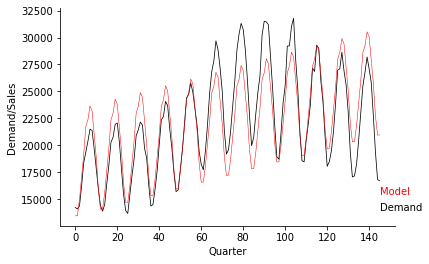

In [70]:
fig, ax = plt.subplots()
ax.plot(dfPub['Public Construction'],c = 'k', linewidth = .75)
ax.plot(dfPub['Composite'],c = 'r', linewidth = .5)
#ax.set_xlim([0,18])
ax.text(145, 14000,'Demand', color='k')
ax.text(145, 15500,'Model', color='r')
#ax.set_ylim(0, max(y) + 10000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Quarter')
ax.set_ylabel('Demand/Sales')

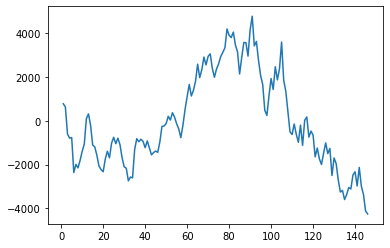

In [56]:
plt.plot(dfPub['Month'],dfPub['R2'])

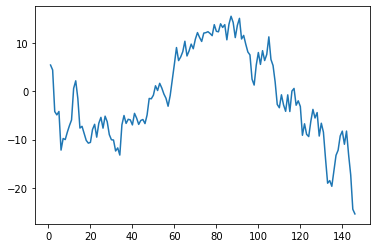

In [57]:
plt.plot(dfPub['Month'],dfPub['errorPerc'])